# Solución de ecuaciones de una variable

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/master/1.0_Solucion_ecuaciones_de_una_variable.ipynb)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Método gráfico

In [4]:
def graficar(f, x_i, x_f, num=1000):
    plt.style.use('seaborn')
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

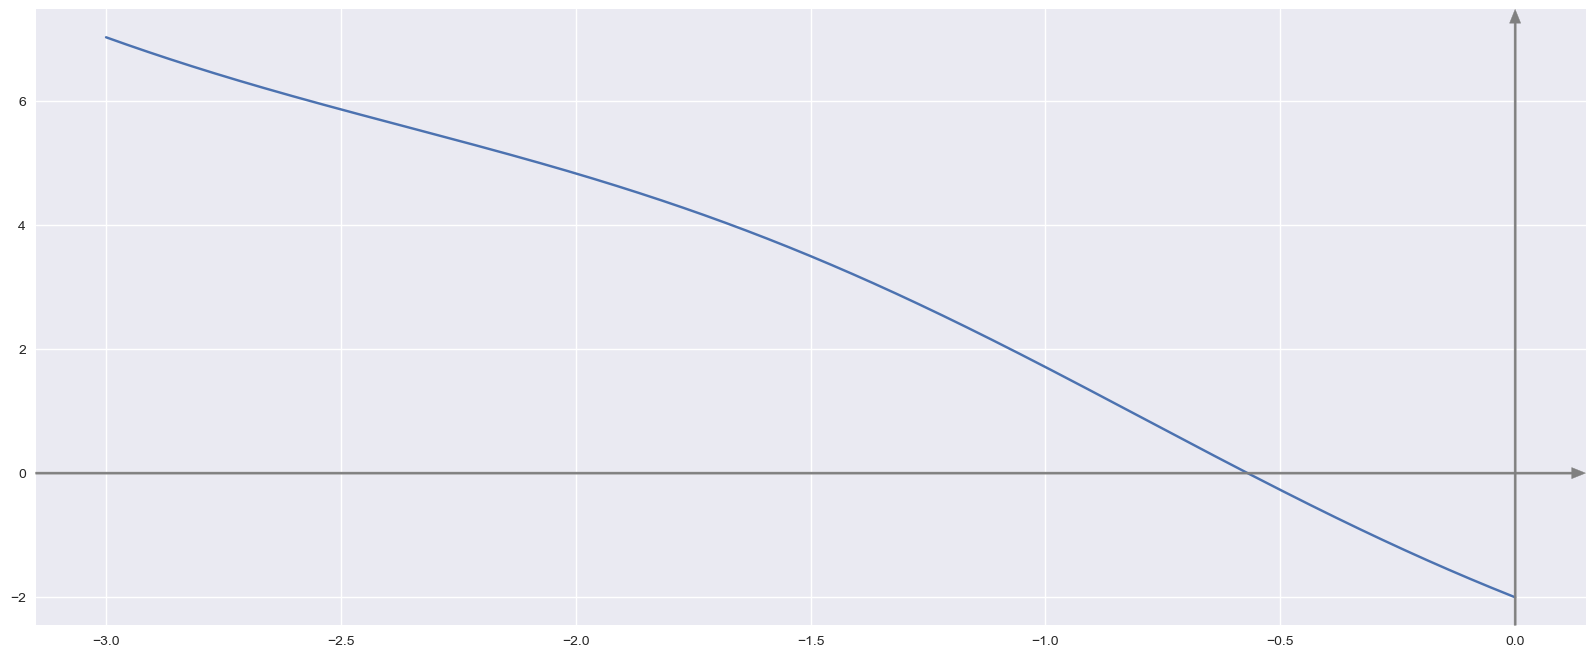

In [5]:
f = lambda x: (np.sin(x))**2 - 3*x - 2
graficar(f, -3, 0)

# Método de Bisección

In [45]:
def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=True):
    if (f(a)*f(b)>=0):
        if verbose:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None


In [9]:
f = lambda x: (np.sin(x))**2 - 3*x - 2

In [26]:
metodo_biseccion(f, -3, 0)

ite:1, a:-3.00000, b:0.00000, p_1:-1.50000
ite:2, a:-1.50000, b:0.00000, p_2:-0.75000
ite:3, a:-0.75000, b:0.00000, p_3:-0.37500
ite:4, a:-0.75000, b:-0.37500, p_4:-0.56250
ite:5, a:-0.75000, b:-0.56250, p_5:-0.65625
ite:6, a:-0.65625, b:-0.56250, p_6:-0.60938
ite:7, a:-0.60938, b:-0.56250, p_7:-0.58594
ite:8, a:-0.58594, b:-0.56250, p_8:-0.57422
ite:9, a:-0.57422, b:-0.56250, p_9:-0.56836
ite:10, a:-0.57422, b:-0.56836, p_10:-0.57129
ite:11, a:-0.57129, b:-0.56836, p_11:-0.56982
ite:12, a:-0.56982, b:-0.56836, p_12:-0.56909
ite:13, a:-0.56982, b:-0.56909, p_13:-0.56946
ite:14, a:-0.56982, b:-0.56946, p_14:-0.56964
ite:15, a:-0.56982, b:-0.56964, p_15:-0.56973
ite:16, a:-0.56973, b:-0.56964, p_16:-0.56969
Solución aproximada encontrada: -0.5696868896484375
número de iteraciones: 16


-0.5696868896484375

# Método *Regula Falsi*

Encontrar las soluciones de la ecuación $e^x - 3 \sin(x) = 3x$

In [22]:
# definimos una nueva función
f = lambda x: np.exp(x) - 3*np.sin(x) - 3*x

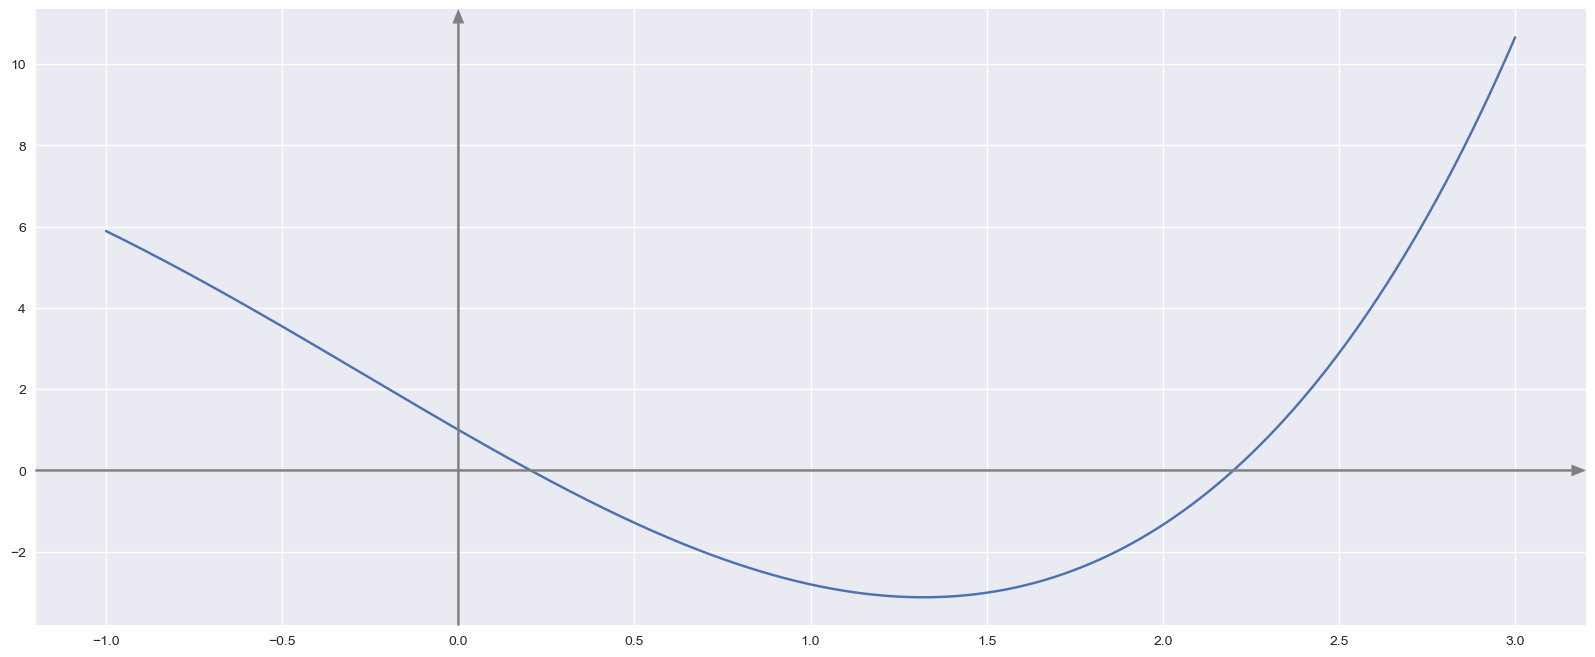

In [28]:
graficar(f, -1, 3)

In [48]:
def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=True):
    if (f(a)*f(b)>=0):
        if verbose:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

In [85]:
metodo_regulafalsi(f, 2, 2.5, tol=1e-10, num=50, verbose=True)

ite:1, a:2.000000000, b:2.500000000, p_1:2.158407894
ite:2, a:2.158407894, b:2.500000000, p_2:2.191980944
ite:3, a:2.191980944, b:2.500000000, p_3:2.198515961
ite:4, a:2.198515961, b:2.500000000, p_4:2.199766419
ite:5, a:2.199766419, b:2.500000000, p_5:2.200004904
ite:6, a:2.200004904, b:2.500000000, p_6:2.200050358
ite:7, a:2.200050358, b:2.500000000, p_7:2.200059021
ite:8, a:2.200059021, b:2.500000000, p_8:2.200060672
ite:9, a:2.200060672, b:2.500000000, p_9:2.200060986
ite:10, a:2.200060986, b:2.500000000, p_10:2.200061046
ite:11, a:2.200061046, b:2.500000000, p_11:2.200061058
ite:12, a:2.200061058, b:2.500000000, p_12:2.200061060
ite:13, a:2.200061060, b:2.500000000, p_13:2.200061060
ite:14, a:2.200061060, b:2.500000000, p_14:2.200061060
Solución aproximada encontrada: 2.200061060202126
número de iteraciones: 14


2.200061060202126

In [84]:
#comparación con el método de bisección para evaluar la rapidez de la convergencia
metodo_biseccion(f, 1, 3, tol=1e-10, num=50, verbose=True)

ite:1, a:1.00000, b:3.00000, p_1:2.00000
ite:2, a:2.00000, b:3.00000, p_2:2.50000
ite:3, a:2.00000, b:2.50000, p_3:2.25000
ite:4, a:2.00000, b:2.25000, p_4:2.12500
ite:5, a:2.12500, b:2.25000, p_5:2.18750
ite:6, a:2.18750, b:2.25000, p_6:2.21875
ite:7, a:2.18750, b:2.21875, p_7:2.20312
ite:8, a:2.18750, b:2.20312, p_8:2.19531
ite:9, a:2.19531, b:2.20312, p_9:2.19922
ite:10, a:2.19922, b:2.20312, p_10:2.20117
ite:11, a:2.19922, b:2.20117, p_11:2.20020
ite:12, a:2.19922, b:2.20020, p_12:2.19971
ite:13, a:2.19971, b:2.20020, p_13:2.19995
ite:14, a:2.19995, b:2.20020, p_14:2.20007
ite:15, a:2.19995, b:2.20007, p_15:2.20001
ite:16, a:2.20001, b:2.20007, p_16:2.20004
ite:17, a:2.20004, b:2.20007, p_17:2.20006
ite:18, a:2.20006, b:2.20007, p_18:2.20007
ite:19, a:2.20006, b:2.20007, p_19:2.20006
ite:20, a:2.20006, b:2.20006, p_20:2.20006
ite:21, a:2.20006, b:2.20006, p_21:2.20006
ite:22, a:2.20006, b:2.20006, p_22:2.20006
ite:23, a:2.20006, b:2.20006, p_23:2.20006
ite:24, a:2.20006, b:2.20006,

2.2000610602262896

In [83]:
metodo_regulafalsi(f, -0.5, 1, tol=1e-10, num=50, verbose=True)

ite:1, a:-0.500000000, b:1.000000000, p_1:0.337232323
ite:2, a:-0.500000000, b:0.337232323, p_2:0.215471924
ite:3, a:-0.500000000, b:0.215471924, p_3:0.206032286
ite:4, a:-0.500000000, b:0.206032286, p_4:0.205427884
ite:5, a:-0.500000000, b:0.205427884, p_5:0.205389790
ite:6, a:-0.500000000, b:0.205389790, p_6:0.205387392
ite:7, a:-0.500000000, b:0.205387392, p_7:0.205387241
ite:8, a:-0.500000000, b:0.205387241, p_8:0.205387231
ite:9, a:-0.500000000, b:0.205387231, p_9:0.205387231
ite:10, a:-0.500000000, b:0.205387231, p_10:0.205387230
Solución aproximada encontrada: 0.2053872304874158
número de iteraciones: 10


0.2053872304874158

# Método Newton-Raphson

In [86]:
def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

In [87]:
# definimos la función y la derivada
f = lambda x: np.exp(x) - 3*np.sin(x) - 3*x
df = lambda x: np.exp(x) - 3*np.cos(x) - 3

In [88]:
metodo_newton_raphson(f, df, 3, tol=1e-10)

ite:0, p_0:3.000000000
ite:1, p_1:2.468366820
ite:2, p_2:2.241654872
ite:3, p_3:2.201279594
ite:4, p_4:2.200062150
ite:5, p_5:2.200061060
ite:6, p_6:2.200061060
Solución aproximada encontrada: 2.200061060220742
número de iteraciones: 6


2.200061060220742

# Método de la secante

In [10]:
def metodo_secante(f, p_i, p_j, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_i:{p_i:.9f}, p_j:{p_j:.9f}')
    while n <= num:
        if f(p_i) - f(p_j) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_n = p_i - f(p_i)*((p_j - p_i)/(f(p_j)-f(p_i)))
        if verbose:
            print(f'ite:{n}, p_j:{p_j:.9f}, p_{n}:{p_n:.9f}')
        if f(p_n) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_n}')
            return p_n
        error = abs(p_n - p_j)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_n}')
                print(f'número de iteraciones: {n}')
            return p_n
        n += 1
        p_i, p_j = p_j, p_n
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

In [11]:
sol= lambda x: x**4 -2

In [12]:
metodo_secante(sol, 1, 1.5)

ite:0, p_i:1.000000000, p_j:1.500000000
ite:1, p_j:1.500000000, p_1:1.123076923
ite:2, p_j:1.123076923, p_2:1.167495969
ite:3, p_j:1.167495969, p_3:1.191135485
ite:4, p_j:1.191135485, p_4:1.189153569
ite:5, p_j:1.189153569, p_5:1.189206985
Solución aproximada encontrada: 1.1892069849324252
número de iteraciones: 5


1.1892069849324252